In [3]:
import requests
import torch
from PIL import Image
from transformers import *
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

C:\Users\divya\anaconda3\Lib\site-packages\transformers\deepspeed.py:24: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


# Using a Trained Model

In [4]:
# load a fine-tuned image captioning model and corresponding tokenizer and image processor
finetuned_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
finetuned_tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
finetuned_image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

loading configuration file config.json from cache at C:\Users\divya\.cache\huggingface\hub\models--nlpconnect--vit-gpt2-image-captioning\snapshots\dc68f91c06a1ba6f15268e5b9c13ae7a7c514084\config.json
Model config VisionEncoderDecoderConfig {
  "_name_or_path": "vit-gpt-pt",
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "bos_token_id": 50256,
  "decoder": {
    "_name_or_path": "",
    "activation_function": "gelu_new",
    "add_cross_attention": true,
    "architectures": [
      "GPT2LMHeadModel"
    ],
    "attn_pdrop": 0.1,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 50256,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": 50256,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "early_stopping": false,
    "embd_pdrop": 0.1,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 50256,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "

size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'longest_edge', 'shortest_edge'}, {'longest_edge'}, {'max_height', 'max_width'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [5]:
import urllib.parse as parse
import os

# a function to determine whether a string is a URL or not
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# a function to load an image
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)


# a function to perform inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)
    # preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)
    # generate the caption (using greedy decoding by default)
    output = model.generate(**img)
    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

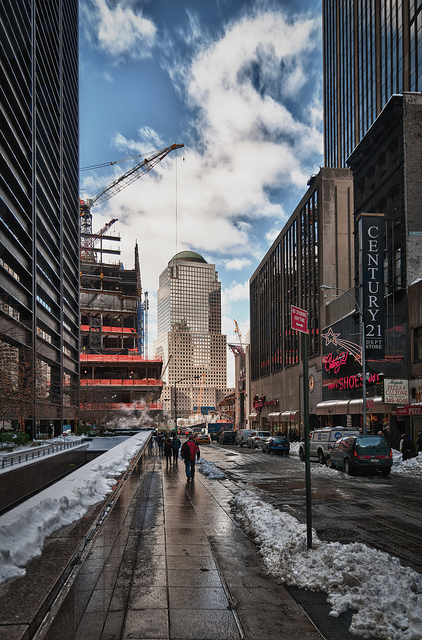

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
C:\Users\divya\anaconda3\Lib\site-packages\transformers\generation\utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


'a person walking down a street with a snow covered sidewalk '

In [6]:
# load displayer
from IPython.display import display

url = "http://images.cocodataset.org/test-stuff2017/000000009384.jpg"
display(load_image(url))
get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)

# Fine-tuning your Own Image Captioning Model

## Loading the Model

In [7]:
# the encoder model that process the image and return the image features
# encoder_model = "WinKawaks/vit-small-patch16-224"
# encoder_model = "google/vit-base-patch16-224"
# encoder_model = "google/vit-base-patch16-224-in21k"
encoder_model = "microsoft/swin-base-patch4-window7-224-in22k"
# the decoder model that process the image features and generate the caption text
# decoder_model = "bert-base-uncased"
# decoder_model = "prajjwal1/bert-tiny"
decoder_model = "gpt2"
# load the model
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    encoder_model, decoder_model
).to(device)

loading configuration file config.json from cache at C:\Users\divya\.cache\huggingface\hub\models--microsoft--swin-base-patch4-window7-224-in22k\snapshots\68dc76680a5bf3bdf670669f3025dc9be2e30781\config.json
Model config SwinConfig {
  "_name_or_path": "microsoft/swin-base-patch4-window7-224-in22k",
  "architectures": [
    "SwinForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    18,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "encoder_stride": 32,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "id2label": {
    "0": "organism, being",
    "1": "benthos",
    "2": "heterotroph",
    "3": "cell",
    "4": "person, individual, someone, somebody, mortal, soul",
    "5": "animal, animate_being, beast, brute, creature, fauna",
    "6": "plant, flora, plant_life",
    "7": "food, nutrient",
    "8": "artifact, artefact",
    "9": "hop",
    "10": "check-in",
    "11": "dressage",
    "12": "curvet, 

loading weights file model.safetensors from cache at C:\Users\divya\.cache\huggingface\hub\models--microsoft--swin-base-patch4-window7-224-in22k\snapshots\68dc76680a5bf3bdf670669f3025dc9be2e30781\model.safetensors
Some weights of the model checkpoint at microsoft/swin-base-patch4-window7-224-in22k were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of SwinModel were initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224-in22k.
If your task is similar to the task the mod

In [8]:
# initialize the tokenizer
# tokenizer = AutoTokenizer.from_pretrained(decoder_model)
tokenizer = GPT2TokenizerFast.from_pretrained(decoder_model)
# tokenizer = BertTokenizerFast.from_pretrained(decoder_model)
# load the image processor
image_processor = ViTImageProcessor.from_pretrained(encoder_model)

loading file vocab.json from cache at C:\Users\divya\.cache\huggingface\hub\models--gpt2\snapshots\607a30d783dfa663caf39e06633721c8d4cfcd7e\vocab.json
loading file merges.txt from cache at C:\Users\divya\.cache\huggingface\hub\models--gpt2\snapshots\607a30d783dfa663caf39e06633721c8d4cfcd7e\merges.txt
loading file tokenizer.json from cache at C:\Users\divya\.cache\huggingface\hub\models--gpt2\snapshots\607a30d783dfa663caf39e06633721c8d4cfcd7e\tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at C:\Users\divya\.cache\huggingface\hub\models--gpt2\snapshots\607a30d783dfa663caf39e06633721c8d4cfcd7e\tokenizer_config.json
loading configuration file config.json from cache at C:\Users\divya\.cache\huggingface\hub\models--gpt2\snapshots\607a30d783dfa663caf39e06633721c8d4cfcd7e\config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "

In [9]:
if "gpt2" in decoder_model:
  # gpt2 does not have decoder_start_token_id and pad_token_id
  # but has bos_token_id and eos_token_id
  tokenizer.pad_token = tokenizer.eos_token # pad_token_id as eos_token_id
  model.config.eos_token_id = tokenizer.eos_token_id
  model.config.pad_token_id = tokenizer.pad_token_id
  # set decoder_start_token_id as bos_token_id
  model.config.decoder_start_token_id = tokenizer.bos_token_id
else:
  # set the decoder start token id to the CLS token id of the tokenizer
  model.config.decoder_start_token_id = tokenizer.cls_token_id
  # set the pad token id to the pad token id of the tokenizer
  model.config.pad_token_id = tokenizer.pad_token_id

## Downloading & Loading the Dataset

In [10]:
from datasets import load_dataset

max_length = 32 # max length of the captions in tokens
coco_dataset_ratio = 50 # 50% of the COCO2014 dataset
train_ds = load_dataset("HuggingFaceM4/COCO", split=f"train[:{coco_dataset_ratio}%]")
valid_ds = load_dataset("HuggingFaceM4/COCO", split=f"validation[:{coco_dataset_ratio}%]")
test_ds = load_dataset("HuggingFaceM4/COCO", split="test")
len(train_ds), len(valid_ds), len(test_ds)

(283374, 12505, 25010)

## Preprocessing the Inputs

In [11]:
# Define a helper function to encapsulate the lambda functionality
def is_image_valid(item):
    import numpy as np  # Import numpy inside the function
    return np.array(item["image"]).ndim in [3, 4]

# Apply the filter to the datasets using the helper function
train_ds = train_ds.filter(is_image_valid, num_proc=2)
valid_ds = valid_ds.filter(is_image_valid, num_proc=2)
test_ds = test_ds.filter(is_image_valid, num_proc=2)


In [12]:
def preprocess(items):
  # preprocess the image
  pixel_values = image_processor(items["image"], return_tensors="pt").pixel_values.to(device)
  # tokenize the caption with truncation and padding
  targets = tokenizer([ sentence["raw"] for sentence in items["sentences"] ],
                      max_length=max_length, padding="max_length", truncation=True, return_tensors="pt").to(device)
  return {'pixel_values': pixel_values, 'labels': targets["input_ids"]}


# using with_transform to preprocess the dataset during training
train_dataset = train_ds.with_transform(preprocess)
valid_dataset = valid_ds.with_transform(preprocess)
test_dataset  = test_ds.with_transform(preprocess)

In [13]:
# a function we'll use to collate the batches
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.stack([x['labels'] for x in batch])
    }

## Evaluation Metrics

In [14]:
import evaluate

# load the rouge and bleu metrics
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

def compute_metrics(eval_pred):
  preds = eval_pred.label_ids
  labels = eval_pred.predictions
  # decode the predictions and labels
  pred_str = tokenizer.batch_decode(preds, skip_special_tokens=True)
  labels_str = tokenizer.batch_decode(labels, skip_special_tokens=True)
  # compute the rouge score
  rouge_result = rouge.compute(predictions=pred_str, references=labels_str)
  # multiply by 100 to get the same scale as the rouge score
  rouge_result = {k: round(v * 100, 4) for k, v in rouge_result.items()}
  # compute the bleu score
  bleu_result = bleu.compute(predictions=pred_str, references=labels_str)
  # get the length of the generated captions
  generation_length = bleu_result["translation_length"]
  return {
        **rouge_result,
        "bleu": round(bleu_result["bleu"] * 100, 4),
        "gen_len": bleu_result["translation_length"] / len(preds)
  }

## Training

In [15]:
num_epochs = 1 # number of epochs
batch_size = 16 # the size of batches

In [16]:
for item in train_dataset:
  print(item["labels"].shape)
  print(item["pixel_values"].shape)
  break

torch.Size([32])
torch.Size([3, 224, 224])


### Using the Trainer Class

###Using PyTorch Training Loop

In [17]:
from torch.utils.data import Subset
from torch.utils.data import DataLoader
valid_dataset_subset = Subset(valid_dataset, list(range(100)))
train_dataset_subset = Subset(train_dataset, list(range(2000)))

valid_dataset_loader = DataLoader(valid_dataset_subset, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
train_dataset_loader = DataLoader(train_dataset_subset, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
test_dataset_loader = DataLoader(test_dataset, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)

In [18]:
from torch.optim import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

In [19]:
# Training loop


# print some statistics before training
# number of training steps
n_train_steps = num_epochs * len(train_dataset_loader)
# number of validation steps
n_valid_steps = len(valid_dataset_loader)
# current training step
current_step = 0
# logging, eval & save steps
save_steps = 30

In [20]:
import dagshub
dagshub.init(repo_owner='itsprashanth.p', repo_name='image_captioning_types', mlflow=True)

Accessing as itsprashanth.p

Initialized MLflow to track repo "itsprashanth.p/image_captioning_types"

Repository itsprashanth.p/image_captioning_types initialized!

In [ ]:
import mlflow
import mlflow.pytorch
from mlflow.tracking import MlflowClient

# Set the MLflow tracking URI and experiment
mlflow.set_tracking_uri("https://dagshub.com/itsprashanth.p/image_captioning_types.mlflow")  # Your specified tracking URI
mlflow.set_experiment("Image Captioning_types")  # Set the experiment name
run_name= f"image_captioning_{tokenizer.__class__.__name__}_{image_processor.__class__.__name__}"
# Log model parameters (without learning rate)
params = {
    "batch_size": batch_size,
    "num_epochs": num_epochs,
    "optimizer": optimizer.__class__.__name__,  # Logging optimizer type
    "save_steps": save_steps,
    "tokenizer_vocab_size": tokenizer.vocab_size,  # Log tokenizer vocab size
    "tokenizer_type": tokenizer.__class__.__name__,  # Log tokenizer type
    "image_processor_size": image_processor.size,  # Log image processor input size
    "image_processor_type": image_processor.__class__.__name__  # Log image processor type
}

# Initialize best BLEU score to a very low value for comparison
best_bleu = float('-inf')  # Since higher BLEU is better, we start from -inf

# Start MLflow run
with mlflow.start_run(run_name= run_name):
    # Log the parameters at the start of the run (without learning rate)
    mlflow.log_params(params)
    
    for epoch in range(num_epochs):
        # set the model to training mode
        model.train()
        # initialize the training loss
        train_loss = 0
        for batch in tqdm(train_dataset_loader, "Training", total=len(train_dataset_loader), leave=False):
            if current_step % save_steps == 0:
                ### evaluation code ###
                # evaluate on the validation set
                print()
                print(f"Validation at step {current_step}...")
                print()
                # set the model to evaluation mode
                model.eval()
                # initialize our lists that store the predictions and the labels
                predictions, labels = [], []
                # initialize the validation loss
                valid_loss = 0
                for batch in valid_dataset_loader:
                    # get the batch
                    pixel_values = batch["pixel_values"]
                    label_ids = batch["labels"]
                    # forward pass
                    outputs = model(pixel_values=pixel_values, labels=label_ids)
                    # get the loss
                    loss = outputs.loss
                    valid_loss += loss.item()
                    # free the GPU memory
                    logits = outputs.logits.detach().cpu()
                    # add the predictions to the list
                    predictions.extend(logits.argmax(dim=-1).tolist())
                    # add the labels to the list
                    labels.extend(label_ids.tolist())
                # make the EvalPrediction object that the compute_metrics function expects
                eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
                # compute the metrics
                metrics = compute_metrics(eval_prediction)
                # print the stats
                print()
                print(f"Epoch: {epoch}, Step: {current_step}, Train Loss: {train_loss / save_steps:.4f}, " +
                      f"Valid Loss: {valid_loss / n_valid_steps:.4f}, BLEU: {metrics['bleu']:.4f}, " +
                      f"ROUGE-1: {metrics['rouge1']:.4f}, ROUGE-2: {metrics['rouge2']:.4f}, ROUGE-L: {metrics['rougeL']:.4f}")
                print()
                # log the metrics to MLflow
                mlflow.log_metric("valid_loss", valid_loss / n_valid_steps, step=current_step)
                mlflow.log_metric("bleu", metrics["bleu"], step=current_step)
                mlflow.log_metric("rouge1", metrics["rouge1"], step=current_step)
                mlflow.log_metric("rouge2", metrics["rouge2"], step=current_step)
                mlflow.log_metric("rougeL", metrics["rougeL"], step=current_step)
                
                # Check if the BLEU score improved
                current_bleu = metrics["bleu"]
                if current_bleu > best_bleu:  # Improvement in BLEU score
                    print(f"BLEU improved from {best_bleu:.4f} to {current_bleu:.4f}")
                    best_bleu = current_bleu  # Update the best BLEU score
                    
                    # Save the model locally
                    model_path = f"./image-captioning/checkpoint-{current_step}"
                    model.save_pretrained(model_path)
                    tokenizer.save_pretrained(model_path)
                    image_processor.save_pretrained(model_path)
                    
                    # Log model to MLflow
                    mlflow.pytorch.log_model(model, "model", registered_model_name=run_name)
                    description = (f"Model trained with batch size: {batch_size}, num_epochs: {num_epochs}, "
                       f"optimizer: {optimizer.__class__.__name__}, save_steps: {save_steps}.\n"
                       f"Tokenizer: {tokenizer.__class__.__name__} (vocab size: {tokenizer.vocab_size}), "
                       f"Image Processor: {image_processor.__class__.__name__} (size: {image_processor.size}).\n"
                       f"Best metrics: BLEU: {metrics['bleu']:.4f}, ROUGE-1: {metrics['rouge1']:.4f}, "
                       f"ROUGE-2: {metrics['rouge2']:.4f}, ROUGE-L: {metrics['rougeL']:.4f}")
                    client = MlflowClient()

                    # Update the description of the registered model version
                    client.update_registered_model(
                        name=run_name,

                        description=description  # Add the custom description here
                    )
                # get the model back to train mode
                model.train()
                # reset the train and valid loss
                train_loss, valid_loss = 0, 0

            ### training code below ###
            # get the batch & convert to tensor
            pixel_values = batch["pixel_values"]
            labels = batch["labels"]
            # forward pass
            outputs = model(pixel_values=pixel_values, labels=labels)
            # get the loss
            loss = outputs.loss
            # backward pass
            loss.backward()
            # update the weights
            optimizer.step()
            # zero the gradients
            optimizer.zero_grad()
            # log the loss
            loss_v = loss.item()
            train_loss += loss_v
            # increment the step
            current_step += 1
            # log the training loss to MLflow
            mlflow.log_metric("train_loss", loss_v, step=current_step)


Training:   0%|          | 0/125 [00:00<?, ?it/s]


Validation at step 0...


Epoch: 0, Step: 0, Train Loss: 0.0000, Valid Loss: 10.3199, BLEU: 0.0000, ROUGE-1: 25.1664, ROUGE-2: 4.2820, ROUGE-L: 23.1434

BLEU improved from -inf to 0.0000


Configuration saved in ./image-captioning/checkpoint-0\config.json
Configuration saved in ./image-captioning/checkpoint-0\generation_config.json
Model weights saved in ./image-captioning/checkpoint-0\model.safetensors
tokenizer config file saved in ./image-captioning/checkpoint-0\tokenizer_config.json
Special tokens file saved in ./image-captioning/checkpoint-0\special_tokens_map.json
Image processor saved in ./image-captioning/checkpoint-0\preprocessor_config.json
2024/10/16 21:59:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'image_captioning_GPT2TokenizerFast_ViTImageProcessor' already exists. Creating a new version of this model...
2024/10/16 22:05:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: image_captioning_GPT2TokenizerFast_ViTImageProcessor, version


Validation at step 30...


Epoch: 0, Step: 30, Train Loss: 3.6357, Valid Loss: 1.4921, BLEU: 3.1514, ROUGE-1: 29.7102, ROUGE-2: 5.7724, ROUGE-L: 27.1230

BLEU improved from 0.0000 to 3.1514


Configuration saved in ./image-captioning/checkpoint-30\config.json
Configuration saved in ./image-captioning/checkpoint-30\generation_config.json
Model weights saved in ./image-captioning/checkpoint-30\model.safetensors
tokenizer config file saved in ./image-captioning/checkpoint-30\tokenizer_config.json
Special tokens file saved in ./image-captioning/checkpoint-30\special_tokens_map.json
Image processor saved in ./image-captioning/checkpoint-30\preprocessor_config.json
2024/10/16 22:29:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'image_captioning_GPT2TokenizerFast_ViTImageProcessor' already exists. Creating a new version of this model...
2024/10/16 22:35:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: image_captioning_GPT2TokenizerFast_ViTImageProcessor, v


Validation at step 60...


Epoch: 0, Step: 60, Train Loss: 1.5580, Valid Loss: 1.3707, BLEU: 3.4906, ROUGE-1: 33.1719, ROUGE-2: 6.6845, ROUGE-L: 32.2132

BLEU improved from 3.1514 to 3.4906


Configuration saved in ./image-captioning/checkpoint-60\config.json
Configuration saved in ./image-captioning/checkpoint-60\generation_config.json
Model weights saved in ./image-captioning/checkpoint-60\model.safetensors
tokenizer config file saved in ./image-captioning/checkpoint-60\tokenizer_config.json
Special tokens file saved in ./image-captioning/checkpoint-60\special_tokens_map.json
Image processor saved in ./image-captioning/checkpoint-60\preprocessor_config.json
2024/10/16 22:58:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'image_captioning_GPT2TokenizerFast_ViTImageProcessor' already exists. Creating a new version of this model...
2024/10/16 23:03:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: image_captioning_GPT2TokenizerFast_ViTImageProcessor, v

In [ ]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

# Load the encoder and decoder from the MLflow Model Registry
model = mlflow.pytorch.load_model("models:/ImageCaptioningModel/latest")

# Models Evaluation

In [73]:
def get_evaluation_metrics(model, dataset):
  model.eval()
  # define our dataloader
  dataloader = DataLoader(dataset, collate_fn=collate_fn, batch_size=batch_size)
  # number of testing steps
  n_test_steps = len(dataloader)
  # initialize our lists that store the predictions and the labels
  predictions, labels = [], []
  # initialize the test loss
  test_loss = 0.0
  for batch in tqdm(dataloader, "Evaluating"):
      # get the batch
      pixel_values = batch["pixel_values"]
      label_ids = batch["labels"]
      # forward pass
      outputs = model(pixel_values=pixel_values, labels=label_ids)
      # outputs = model.generate(pixel_values=pixel_values, max_length=max_length)
      # get the loss
      loss = outputs.loss
      test_loss += loss.item()
      # free the GPU memory
      logits = outputs.logits.detach().cpu()
      # add the predictions to the list
      predictions.extend(logits.argmax(dim=-1).tolist())
      # add the labels to the list
      labels.extend(label_ids.tolist())
  # make the EvalPrediction object that the compute_metrics function expects
  eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
  # compute the metrics
  metrics = compute_metrics(eval_prediction)
  # add the test_loss to the metrics
  metrics["test_loss"] = test_loss / n_test_steps
  return metrics

In [39]:
metrics = get_evaluation_metrics(_model, test_dataset)


Evaluating:   0%|          | 1/1558 [01:15<32:39:47, 75.52s/it]


KeyboardInterrupt: 

# Performing Inference

In [29]:
def show_image_and_captions(url):
  # get the image and display it
  display(load_image(url))
  # get the captions on various models
  our_caption = get_caption(model, image_processor, tokenizer, url)
  
  # print the captions
  print(f"Our caption: {our_caption}")


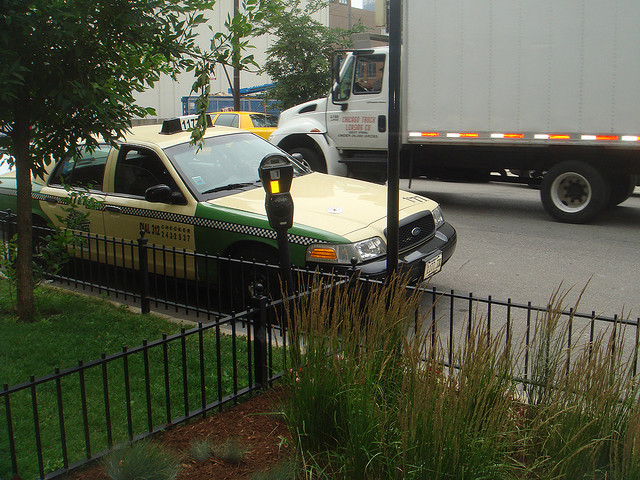

Our caption: a truck driving down a street next to a fence 
nlpconnect/vit-gpt2-image-captioning caption: a green truck parked next to a curb 
Abdou/vit-swin-base-224-gpt2-image-captioning caption: A police car parked next to a fence.


In [32]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000001.jpg")